In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter

In [2]:
df = pd.read_csv('../data/2425_QC_processed.csv')

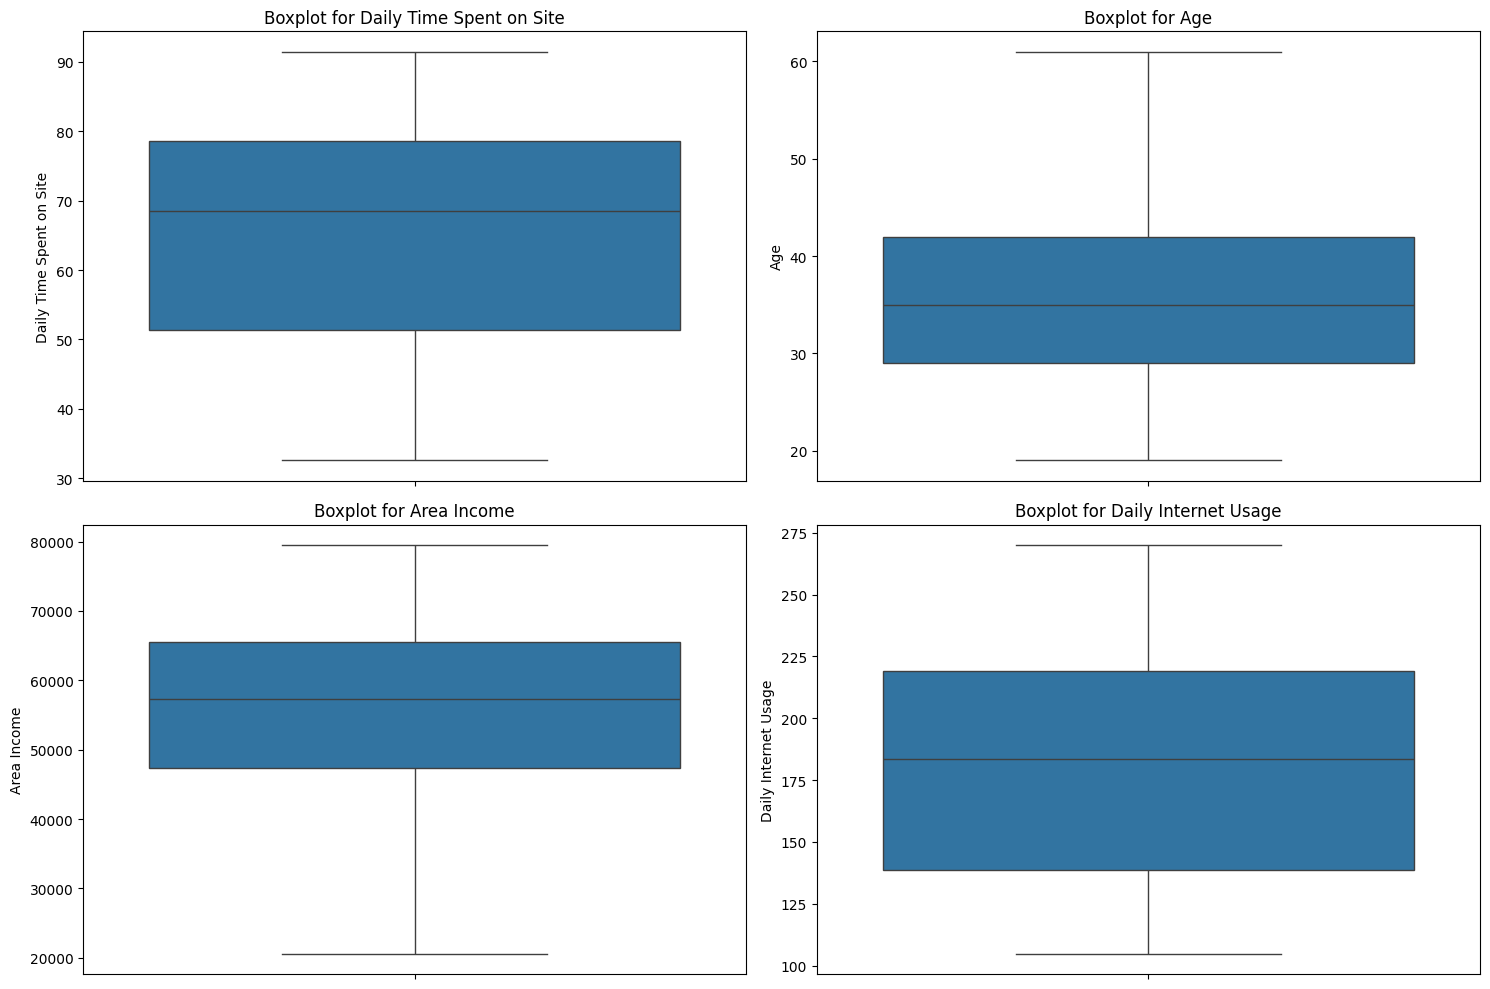

In [3]:
# Vẽ boxplot nhằm kiểm tra outlier cho các cột có dữ liệu là số
numerical_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(df[col])
    plt.title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()

Các biểu đồ boxplot cho thấy sự hiện diện của outliers trong Area Income còn chứa một số giá trị thu nhập nằm ngoài ngưỡng (outliers).

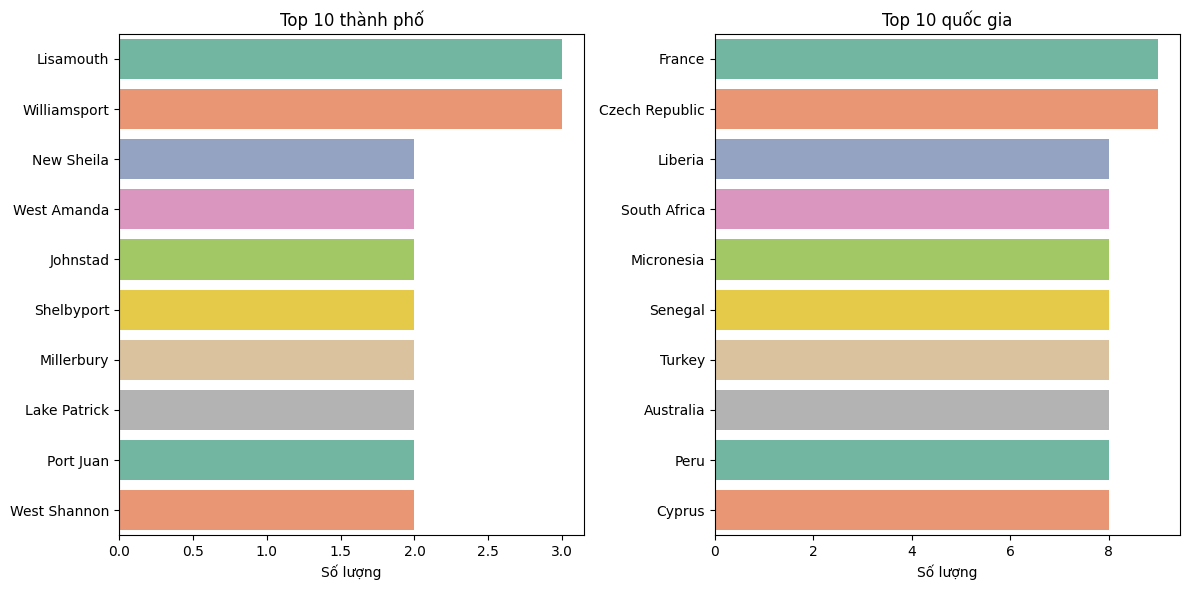

In [80]:
# Lấy 10 giá trị phổ biến nhất
top_cities = df['City'].value_counts().head(10)
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette='Set2', legend=False)
plt.xlabel('Số lượng')
plt.title('Top 10 thành phố')
plt.ylabel('')

plt.subplot(1, 2, 2)
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='Set2', legend=False)
plt.xlabel('Số lượng')
plt.title('Top 10 quốc gia')
plt.ylabel('')

plt.tight_layout()
plt.show()

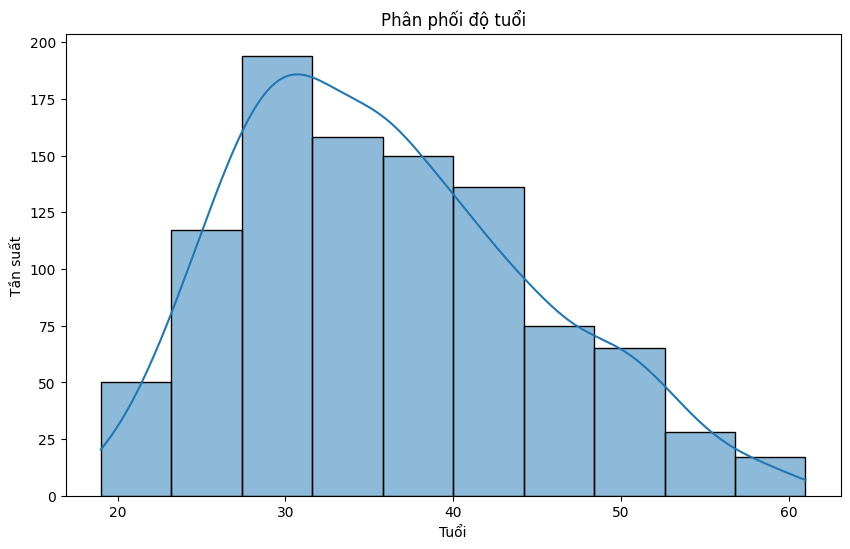

In [57]:
# Phân tích đơn biến - phân phối tuổi
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Phân phối độ tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Tần suất')
plt.show()

In [71]:
# Phân tích đơn biến
print("\nPhân tích dữ liệu đơn biến:")
summary = df.describe().T
styled_summary = summary.style \
    .format("{:.2f}")

styled_summary


Phân tích dữ liệu đơn biến:


,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,990.00,65.06,15.91,32.60,51.32,68.44,78.59,91.43
Age,990.00,35.99,8.80,19.00,29.00,35.00,42.00,61.00
Area Income,990.00,55384.82,12919.17,20592.99,47366.03,57295.42,65557.02,79484.80
Daily Internet Usage,990.00,180.03,44.05,104.78,138.69,183.45,218.93,269.96
Male,990.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
Clicked on Ad,990.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00


Dựa trên bảng số liệu và các biểu đồ boxplot, histogram, Ta thấy:

- Dữ liệu có đến 52% người dùng là nữ.

- Dữ liệu cho thấy người dùng có sự phân bổ độ tuổi khá đồng đều, với phần lớn nằm trong độ tuổi từ 29 đến 42.

- Phần lớn người dùng dành từ 51 đến 79 phút trên trang web mỗi ngày, nhưng mức độ sử dụng internet lại có sự chênh lệch lớn, với một số người dùng có thể sử dụng hơn 4 giờ (240 phút) mỗi ngày.

- Về thu nhập, phần lớn người dùng có thu nhập ở mức khá cao (trung bình 55,384 USD), với sự phân bổ từ thấp đến cao khá đều giữa các nhóm.

- Tỷ lệ người dùng nhấp vào quảng cáo (khoảng 49%) khá gần với tỷ lệ người không nhấp, cho thấy quảng cáo có ảnh hưởng nhưng không quá lớn.

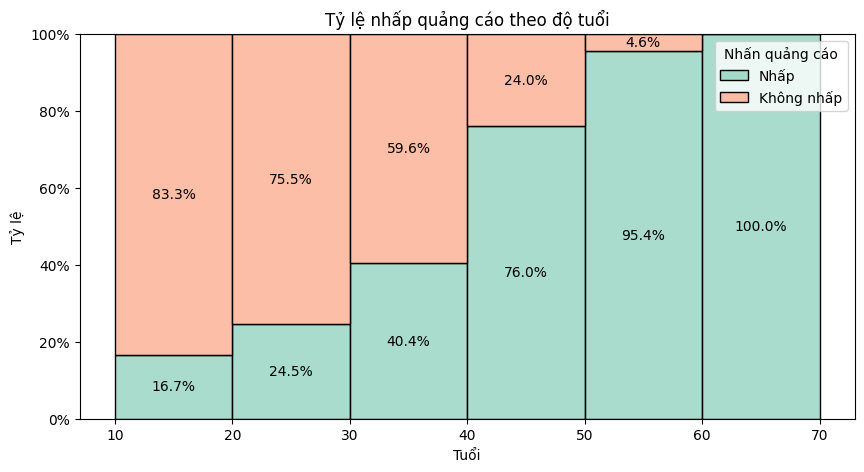

In [90]:
# Tỷ lệ nhấp quảng cáo theo từng độ tuổi
plt.figure(figsize=(10, 5))
ax = sns.histplot(
    df, 
    x='Age', 
    hue='Clicked on Ad', 
    multiple='fill', 
    bins= np.arange(0, 101, 10), 
    kde=False, 
    palette={0: '#fca989', 1: '#8cd1bb'} 
)
# Ghi phần trăm lên biểu đồ
for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Tỷ lệ nhấp quảng cáo theo độ tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Tỷ lệ')
plt.legend(title='Nhấn quảng cáo', labels=['Nhấp', 'Không nhấp'],loc = 'upper right')
plt.show()


Ta có thể thấy, độ tuổi ảnh hưởng rất lớn đến tỷ lệ nhấp quảng cáo. Biểu đồ cho ta thấy rõ một sự tương quan dương giữa tuổi với tỷ lệ nhấn quảng cáo. Nhóm người lớn tuổi sẽ có xu hướng nhấn vào quảng cáo lướn hơn so với nhóm người nhỏ tuổi. Thể hiện rõ nhất ở nhóm tuổi 60-70 khi mà đến tới 100% người dùng ở nhóm tuổi đó nhấn quảng cáo so với nhóm tuổi 10-20 chỉ vỏn vẹn 16.7%. Việc này cho ta thấy nên có các chiến dịch, phát triển quảng cáo với đối tượng người trẻ nếu ta muốn tối đa hóa tỷ lệ nhấn quảng cáo. 

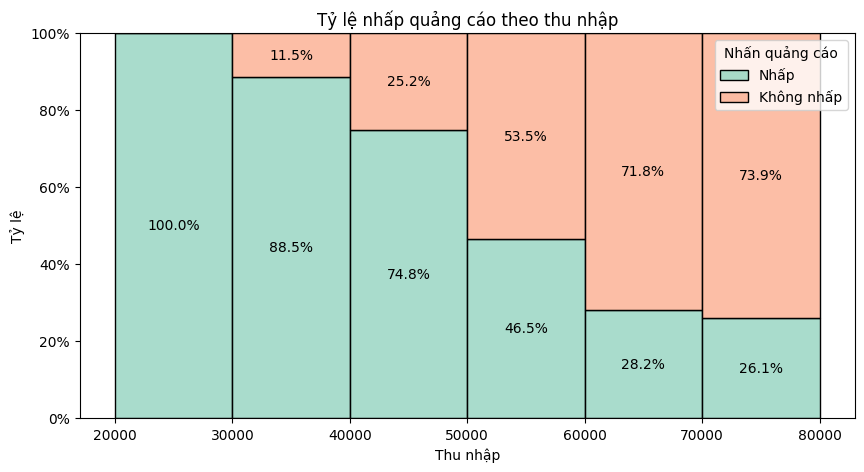

In [91]:
# Tỷ lệ nhấp quảng cáo theo thu nhập
plt.figure(figsize=(10, 5))
ax = sns.histplot(
    df, 
    x='Area Income', 
    hue='Clicked on Ad', 
    multiple='fill', 
    bins= np.arange(0, 100001, 10000), 
    kde=False, 
    palette={0: '#fca989', 1: '#8cd1bb'} 
)
# Ghi phần trăm lên biểu đồ
for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Tỷ lệ nhấp quảng cáo theo thu nhập')
plt.xlabel('Thu nhập')
plt.ylabel('Tỷ lệ')
plt.legend(title='Nhấn quảng cáo', labels=['Nhấp', 'Không nhấp'],loc = 'upper right')
plt.show()

Biểu đồ trên cũng thể hiện cho ta thấy tương quan nghịch giữa Thu nhập và tỷ lệ nhấn quảng cáo. Khi người có thu nhập thấp trong tổng thể bộ dữ liệu lại có xu hướng nhấn vào quảng cáo nhiều hơn so với người có thu nhập cao trong bộ dữ liệu. Việc này cũng một phần phản ánh đúng xã hội vì đa số người có thu nhập cao thường sẽ không bị hấp dẫn bởi quảng cáo. Vậy nên, để tối đa hóa tỷ lệ nhấn quảng cáo, phải có những chiến lược, những cải tiến nhắm đến các đối tượng có thu nhập cao.

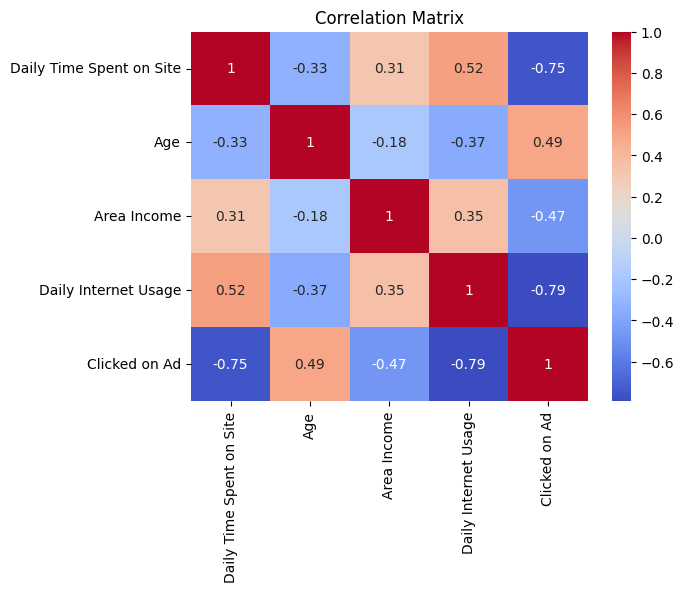

In [6]:
# Tương quan giữa các cột số liệu
correlation_matrix = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Biểu đồ tương quan trên cho ta thấy ảnh hưởng giữa các cột thuộc tính với nhau. Đối tượng mà ta muốn nhắm đến là thuộc tính 'Clicked on Ad' có sự tương quan rất cao với các thuộc tính còn lại trong bộ dữ liệu (hệ số tương quan > 0.4). Vậy nên, nhóm quyết định giữ lại hết tất cả các cột số liệu định lượng này trong bộ dữ liệu.

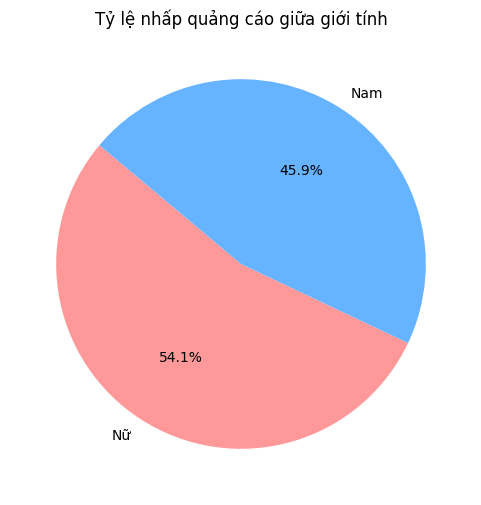

In [10]:
# Tỷ lệ nhấp quảng cáo theo giới tính
grouped_data = df[df["Clicked on Ad"] == 1].groupby("Male").size()
labels = ["Nữ", "Nam"]
sizes = [grouped_data.get(0, 0), grouped_data.get(1, 0)]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#ff9999", "#66b3ff"]
)
plt.title("Tỷ lệ nhấp quảng cáo giữa giới tính")
plt.show()

Biểu đồ trên cho ta thấy rằng quảng cáo ảnh hưởng tốt hơn đối với phái nữ khi chiếm đến 54.1% người nhấn quảng cáo là nữ.